<a href="https://colab.research.google.com/github/Leslyndizeye/FORMATIVE-ASSIGNMENT-ADVANCED-LINEAR-ALGEBRA-PCA-/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Allow uploading file that contains datasets

In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving fuel_econ.csv to fuel_econ.csv


Initialize the file to a variable

In [ ]:
df = pd.read_csv('fuel_econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Selecting only numeric columns from the dataset

In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Convert the DataFrame to a NumPy array
numeric_data = df_numeric.to_numpy()

print(numeric_data.shape)

(3929, 14)


Standardizing the data

In [ ]:
data = numeric_data

mean = np.mean(data, axis=0)
std_deviation = np.std(data, axis=0)

standardized_data = (data - mean) / std_deviation
standardized_data[:5]

array([[-1.73714048, -1.47583548,  0.28310163,  0.65053594,  1.46709627,
        -1.21737766, -0.85996012, -0.85242986, -1.29062982, -1.39247459,
        -1.00832279,  1.02283829, -0.95057953, -0.94575548],
       [-1.73668367, -1.47583548, -0.78181585, -0.72799833,  1.86476224,
        -1.21737766,  0.00642675, -0.11743408,  0.18494654, -0.03920038,
         0.07186379, -0.29854998,  0.1886082 ,  0.1942578 ],
       [-1.73622685, -1.47583548,  0.28310163,  0.49736547,  1.86476224,
        -1.21737766, -0.69441634, -0.75324472, -0.5920197 , -0.85174957,
        -0.68633929,  0.56793413, -0.38098566, -0.37574884],
       [-1.73577004, -1.47583548,  0.28310163,  0.49736547,  1.86476224,
        -1.21737766, -0.78280029, -0.830286  , -0.82738386, -1.02758796,
        -0.81865124,  0.752062  , -0.38098566, -0.37574884],
       [-1.73531322, -1.47583548, -0.78181585, -0.42165738, -0.62727784,
         0.73489021,  0.47108294,  0.43314691,  0.96751585,  0.99253135,
         0.64805881, -0.72

Find the covariance matrix

In [ ]:
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix

array([[ 1.00025458,  0.98591866, -0.06011148, -0.07468488, -0.00657025,
        -0.02195656,  0.09182316,  0.09124849,  0.0906161 ,  0.09538375,
         0.09382686, -0.09974229, -0.1279056 , -0.12235207],
       [ 0.98591866,  1.00025458, -0.05532701, -0.07044161,  0.00623397,
        -0.03365174,  0.06806739,  0.06675938,  0.07330836,  0.07766039,
         0.07201181, -0.0811853 , -0.1498676 , -0.14517775],
       [-0.06011148, -0.05532701,  1.00025458,  0.93411019,  0.24763384,
        -0.00426546, -0.69327904, -0.66619842, -0.76646982, -0.77169964,
        -0.73821112,  0.84848979, -0.78405759, -0.78201448],
       [-0.07468488, -0.07044161,  0.93411019,  1.00025458,  0.2594021 ,
         0.02207729, -0.71366074, -0.6863403 , -0.78418374, -0.78865771,
        -0.75859024,  0.85559254, -0.7936343 , -0.79141752],
       [-0.00657025,  0.00623397,  0.24763384,  0.2594021 ,  1.00025458,
        -0.66581137, -0.27817962, -0.27261515, -0.29688365, -0.29858023,
        -0.29095711,  0.28

Eigen decomposition

In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display results
eigenvalues, eigenvectors

(array([8.95720924e+00, 2.06777956e+00, 1.59364217e+00, 6.70587666e-01,
        3.01684118e-01, 1.61017548e-01, 1.25550471e-01, 6.40205207e-02,
        3.23528963e-02, 1.36962433e-02, 9.24627112e-03, 4.24637785e-03,
        2.14358185e-03, 3.87485886e-04]),
 array([[ 1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
          1.83729680e-02, -1.42115022e-02,  7.02789695e-02,
          1.14861126e-01,  4.01097554e-03, -1.15143583e-01,
         -6.95538857e-01, -6.83326435e-02,  2.10633586e-02,
         -7.10578367e-03,  6.07618642e-04],
        [ 1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
         -9.43831862e-03, -1.35600088e-02,  3.37955333e-02,
          8.53170135e-02, -7.51768613e-03, -5.48830131e-02,
          7.10425085e-01,  5.58369479e-02, -9.48384475e-03,
         -3.26885432e-04, -3.98397374e-03],
        [-2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
          6.00933196e-01,  9.71151716e-02, -7.09369930e-02,
          2.53817629e-01, -6.79764243e-01,  1.19688616

Sorting principal component

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors, sorted_eigenvalues

(array([[ 1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
          1.83729680e-02, -1.42115022e-02,  7.02789695e-02,
          1.14861126e-01,  4.01097554e-03, -1.15143583e-01,
         -6.95538857e-01, -6.83326435e-02,  2.10633586e-02,
         -7.10578367e-03,  6.07618642e-04],
        [ 1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
         -9.43831862e-03, -1.35600088e-02,  3.37955333e-02,
          8.53170135e-02, -7.51768613e-03, -5.48830131e-02,
          7.10425085e-01,  5.58369479e-02, -9.48384475e-03,
         -3.26885432e-04, -3.98397374e-03],
        [-2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
          6.00933196e-01,  9.71151716e-02, -7.09369930e-02,
          2.53817629e-01, -6.79764243e-01,  1.19688616e-01,
          2.20121563e-03,  1.99493288e-02,  1.60174402e-02,
          8.04028190e-03, -8.90395340e-04],
        [-2.86142593e-01,  3.10582044e-02,  6.39803619e-02,
          5.69008152e-01, -1.12579685e-02,  5.20085469e-04,
          2.41804525e-01,  7

Dynamically select the number of principal components based on explained variance.

In [ ]:
# Step 1: Calculate the cumulative sum of eigenvalues
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)  # Explained variance per component
cumulative_variance = np.cumsum(explained_variance)  # Cumulative explained variance

# Step 2: Pick number of components based on cumulative variance
num_components = np.argmax(cumulative_variance >= 0.90) + 1

num_components

3

 Projecting Data onto Principal Components

In [ ]:
num_components = num_components

# Select all eigenvectors
top_eigenvectors = sorted_eigenvectors[:, :num_components]

# Project the standardized data onto the selected principal components
reduced_data = np.dot(standardized_data, top_eigenvectors)

# Display the first few rows of the reduced data
reduced_data[:5]

array([[-3.19146207,  1.98769416, -1.85142805],
       [ 0.38752701,  1.99194578, -2.47970321],
       [-2.09148498,  2.03743394, -2.20581408],
       [-2.37914076,  2.06380156, -2.1895205 ],
       [ 2.5972681 ,  2.50420206,  0.47499721]])

Plotting the original data

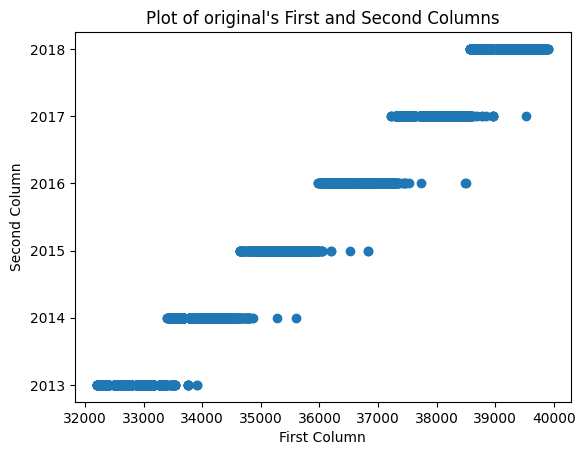

In [42]:
# Plotting original data, first and second column
plt.scatter(numeric_data[:, 0], numeric_data[:, 1])
plt.title('Plot of original\'s First and Second Columns')
plt.xlabel('First Column')
plt.ylabel('Second Column')
plt.show()

Plotting standardized data

Plotting reduced data

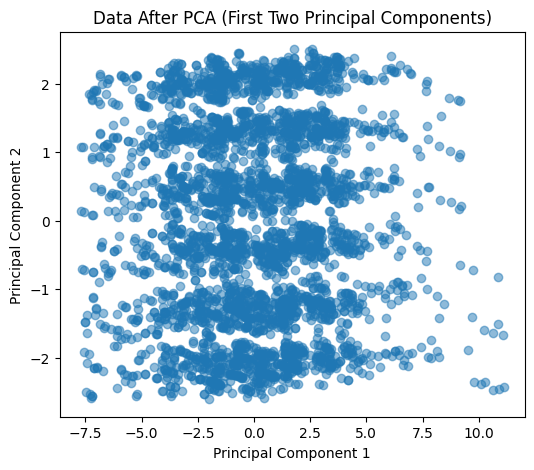

In [39]:
# Assuming you have reduced_data from PCA projection
plt.figure(figsize=(6, 5))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title("Data After PCA (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()